In [2]:
from sklearn import datasets

In [5]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['data'].columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [87]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris.target_names)

['setosa' 'versicolor' 'virginica']




---


# **Breast_cancer**

---



In [6]:
from sklearn import model_selection
X = data_breast_cancer['data'][['mean area', 'mean smoothness']]
y = data_breast_cancer['target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm_clf = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X_train, y_train)
y_predict_test = svm_clf.predict(X_test)
print("Accuracy of breast cancer data: ", accuracy_score(y_test, y_predict_test))
y_predict_train = svm_clf.predict(X_train)

Accuracy of breast cancer data:  0.6228070175438597


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
svm_clf_scaler = Pipeline([("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf_scaler.fit(X_train, y_train)
y_predict_scaler_test = svm_clf_scaler.predict(X_test)
print("Accuracy of breast cancer data with scaling: ", accuracy_score(y_test, y_predict_scaler_test))
y_predict_scaler_train = svm_clf_scaler.predict(X_train)

Accuracy of breast cancer data with scaling:  0.9298245614035088


In [9]:
import pickle
accuracy_results = [accuracy_score(y_train, y_predict_train),
                    accuracy_score(y_test, y_predict_test),
                    accuracy_score(y_train, y_predict_scaler_train),
                    accuracy_score(y_test, y_predict_scaler_test)]

with open('bc_acc.pkl', 'wb') as f:
  pickle.dump(accuracy_results, f)

print(accuracy_results)

[0.6285714285714286, 0.6228070175438597, 0.8923076923076924, 0.9298245614035088]




---

# **Iris**


---



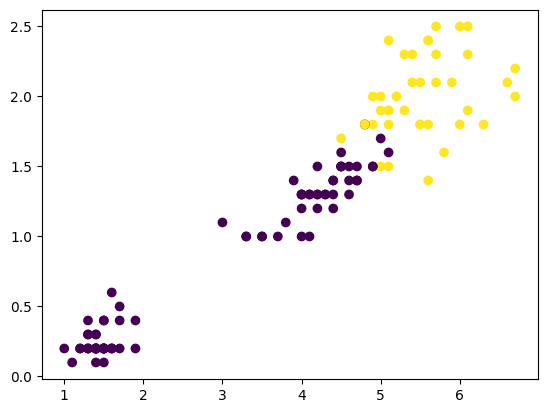

In [88]:
#import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_iris['data'][['petal length (cm)', 'petal width (cm)']], data_iris.target_names[data_iris.target] == 'virginica', test_size=0.2, random_state=42)
#plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, cmap='viridis')
#plt.show()

In [92]:
svm_clf = Pipeline([("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X_train, y_train)
y_predict_test = svm_clf.predict(X_test)
print("Accuracy of iris data: ", accuracy_score(y_test, y_predict_test))
y_predict_train = svm_clf.predict(X_train)

Accuracy of iris data:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [93]:
svm_clf_scaler = Pipeline([("scaler", StandardScaler()), ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf_scaler.fit(X_train, y_train)
y_predict_scaler_test = svm_clf_scaler.predict(X_test)
print("Accuracy of iris data with scaling: ", accuracy_score(y_test, y_predict_scaler_test))
y_predict_scaler_train = svm_clf_scaler.predict(X_train)

Accuracy of iris data with scaling:  1.0


In [94]:
accuracy_results = [accuracy_score(y_train, y_predict_train),
                    accuracy_score(y_test, y_predict_test),
                    accuracy_score(y_train, y_predict_scaler_train),
                    accuracy_score(y_test, y_predict_scaler_test)]

with open('iris_acc.pkl', 'wb') as f:
  pickle.dump(accuracy_results, f)

print(accuracy_results)

[0.9416666666666667, 1.0, 0.9416666666666667, 1.0]




---

# **Regresja**


---



<Axes: xlabel='x', ylabel='y'>

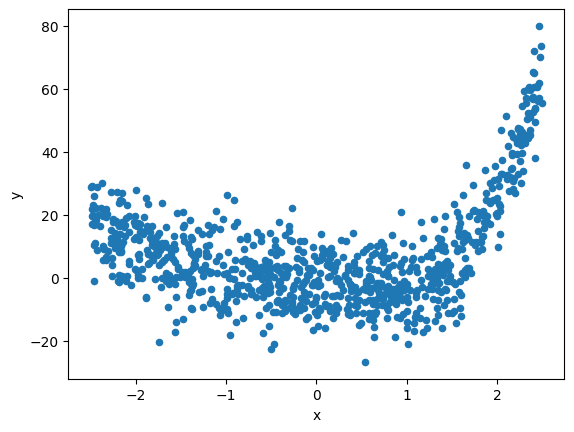

In [ ]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR

pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=4)),
  ('svr', LinearSVR())])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('svr', LinearSVR())])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_pipeline_train = mean_squared_error(y_train, pipeline.predict(X_train))
MSE_pipeline_test = mean_squared_error(y_test, pipeline.predict(X_test))
print("MSE for training set: ", MSE_pipeline_train)
print("MSE for test set: ", MSE_pipeline_test)

MSE for training set:  67.27928675697773
MSE for test set:  63.558726984564785


In [ ]:
from sklearn.svm import SVR

pipeline_svr = Pipeline([('poly_features', PolynomialFeatures(degree=4)),
  ('svr', SVR(kernel='poly', degree=4))])

pipeline_svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('svr', SVR(degree=4, kernel='poly'))])

In [ ]:
MSE_pipeline_svr_train = mean_squared_error(y_train, pipeline_svr.predict(X_train))
MSE_pipeline_svr_test = mean_squared_error(y_test, pipeline_svr.predict(X_test))
print("MSE for training set (SVR): ", MSE_pipeline_svr_train)
print("MSE for test set (SVR): ", MSE_pipeline_svr_test)

MSE for training set (SVR):  83.41802856165152
MSE for test set (SVR):  83.89523684557969


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'coef0': [0.1, 1, 10]}

grid_search = GridSearchCV(SVR(kernel='poly', degree=4), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(df[['x']], df['y'])

print("Best parameters:", grid_search.best_params_)
print("Best negative MSE:", grid_search.best_score_)

Best parameters: {'C': 1, 'coef0': 10}
Best negative MSE: -66.97488430043768


In [ ]:
pipeline_svr_optimal = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4)),
    ('svr', SVR(kernel='poly', degree=4, C=1, coef0=10))
])

pipeline_svr_optimal.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('svr', SVR(C=1, coef0=10, degree=4, kernel='poly'))])

In [ ]:
MSE_pipeline_svr_optimal_train = mean_squared_error(y_train, pipeline_svr_optimal.predict(X_train))
MSE_pipeline_svr_optimal_test = mean_squared_error(y_test, pipeline_svr_optimal.predict(X_test))
print("MSE for training set (SVR_optimal): ", MSE_pipeline_svr_optimal_train)
print("MSE for test set (SVR_optimal): ", MSE_pipeline_svr_optimal_test)

MSE for training set (SVR_optimal):  66.62397014060785
MSE for test set (SVR_optimal):  64.78260529089518


In [ ]:
reg_MSE_ans = [MSE_pipeline_train, MSE_pipeline_test, MSE_pipeline_svr_optimal_train, MSE_pipeline_svr_optimal_test]

with open('reg_mse.pkl', 'wb') as f:
  pickle.dump(reg_MSE_ans, f)

print(reg_MSE_ans)

[67.27928675697773, 63.558726984564785, 66.62397014060785, 64.78260529089518]
